In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Cdf


# Read the file into a DataFrame: df
df = pd.read_csv('Housing_Prices.csv')
pd.set_option("display.max.columns", None)
print(df.head(5))

df.drop('National', axis = 1, inplace = True)
df.drop('Other Areas', axis = 1, inplace = True)

"""subset = df[['Year', 'Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford']]
print(subset.head())"""

# Print the head of df
print(df.head(5))
 
# Print the tail of df
print(df.tail(5))
 
# Print the shape of df
print(df.shape)
 
# Print the columns of df
print(df.columns)
 
 
print(df.info())
 
 
# Calculating summary statistics
print(df.describe())
print(df['Year'].describe())
print(df['Galway'].describe())

# Dublin
df['Dublin'] = df['Dublin'].str.replace(",", "")
df['Dublin'] = df['Dublin'].astype('int')
duplicates = df.duplicated(subset= 'Dublin', keep = False)
duplicated_dublin = df[duplicates].sort_values(by = 'Dublin')
print(duplicated_dublin[['Dublin','Cork','Waterford']])
print(df['Dublin'].mean())
# Cork
df['Cork'] = df['Cork'].str.replace(",", "")
df['Cork'] = df['Cork'].astype('int')
# Galway
df['Galway'] = df['Galway'].str.replace(",", "")
df['Galway'] = df['Galway'].astype('int')
# Limerick
df['Limerick'] = df['Limerick'].str.replace(",", "")
df['Limerick'] = df['Limerick'].astype('int')
# Waterford
df['Waterford'] = df['Waterford'].str.replace(",", "")
df['Waterford'] = df['Waterford'].astype('int')

Dublin = df['Dublin']

cdf_dub = Cdf(Dublin)

# Calculate the 75th percentile 
percentile_75th = cdf_dub.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_dub.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)



   Year National   Dublin     Cork   Galway Limerick Waterford Other Areas
0  1997  102,037  123,231   96,504  111,108   91,236    92,372      94,642
1  1998  124,368  159,558  112,166  118,917  104,327   108,789     116,639
2  1999  147,043  191,942  140,797  137,510  122,146   132,510     137,031
3  2000  166,155  216,433  164,535  160,972  146,838   145,087     154,141
4  2001  181,146  252,192  175,372  171,578  154,515   157,767     167,493
   Year   Dublin     Cork   Galway Limerick Waterford
0  1997  123,231   96,504  111,108   91,236    92,372
1  1998  159,558  112,166  118,917  104,327   108,789
2  1999  191,942  140,797  137,510  122,146   132,510
3  2000  216,433  164,535  160,972  146,838   145,087
4  2001  252,192  175,372  171,578  154,515   157,767
    Year   Dublin     Cork   Galway Limerick Waterford
14  2011  333,747  244,736  229,558  218,341   206,835
15  2012  292,004  235,446  221,159  213,458   179,716
16  2013  321,558  241,127  218,308  207,635   154,051
17  20

In [70]:

# Computing the ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, 

PearsonRResult(statistic=0.5996531686408809, pvalue=0.006651973290971286)
PearsonRResult(statistic=0.4765592277479347, pvalue=0.039126132329284344)


In [4]:
Dublin = df['Dublin']/100
Cork = df['Cork']/100

length = Dublin - Cork

print(length)
print(length.describe())

0      267.27
1      473.92
2      511.45
3      518.98
4      768.20
5      744.97
6      915.37
7     1071.75
8     1213.70
9     1755.12
10    1581.61
11    1106.84
12     389.28
13     514.25
14     890.11
15     565.58
16     804.31
17     973.88
18    1247.17
dtype: float64
count      19.000000
mean      858.618947
std       402.103526
min       267.270000
25%       516.615000
50%       804.310000
75%      1089.295000
max      1755.120000
dtype: float64


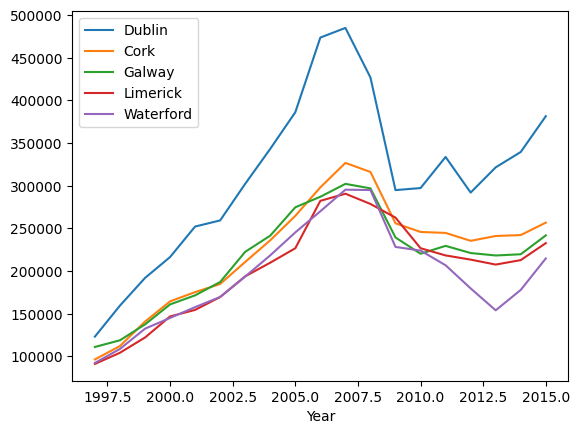

C:\Users\Chad Rice\AppData\Local\Temp\ipykernel_11332\3923229597.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


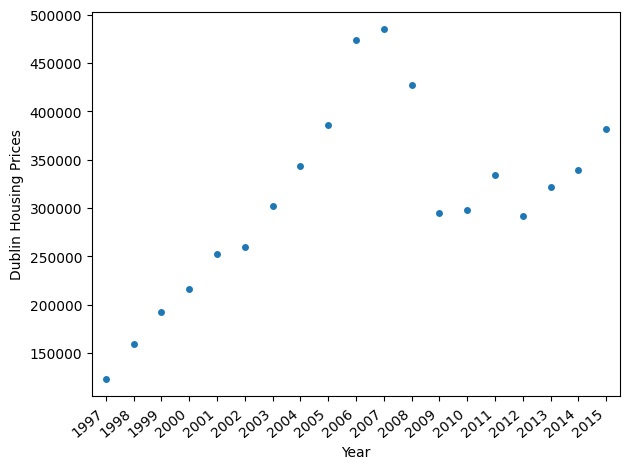

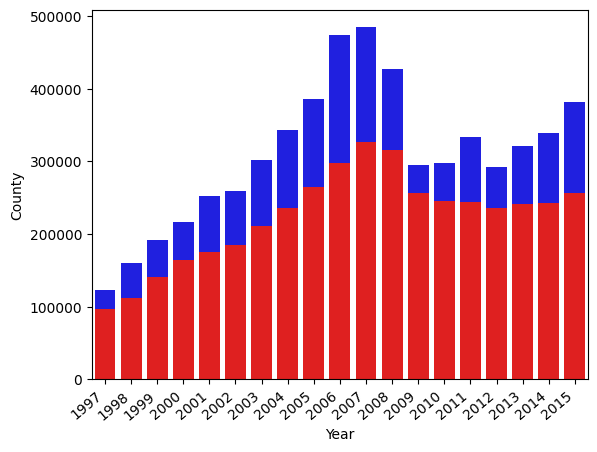

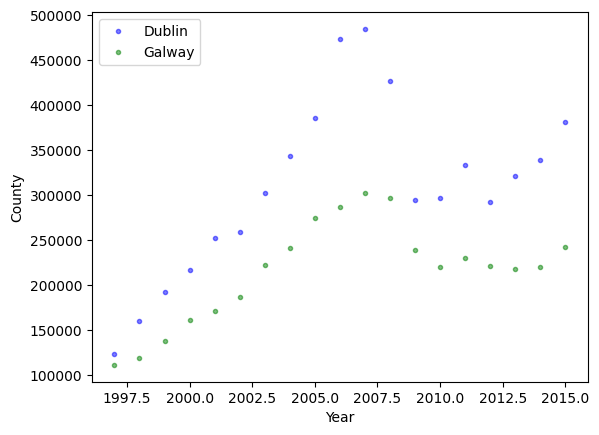

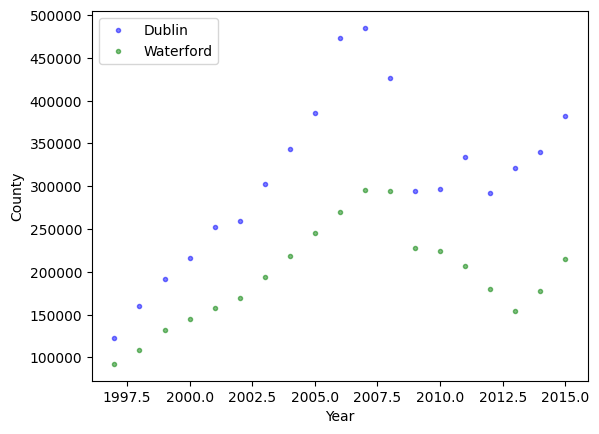

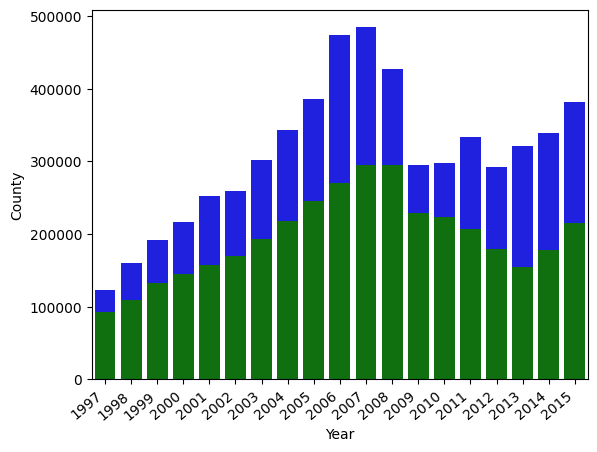

In [5]:
df.plot(x = "Year", y = ['Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford'])
plt.show()


ax = sns.swarmplot(x ='Year', y = 'Dublin', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
_ = plt.xlabel('Year')
_ = plt.ylabel('Dublin Housing Prices')
plt.tight_layout()
plt.show()

County = ['Dublin', 'Cork']
ax = sns.barplot(x = 'Year', y = 'Dublin', data = df, color= 'blue')
bx = sns.barplot(x = 'Year', y = 'Cork', data = df, color= 'red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
_ = plt.xlabel('Year')
_ = plt.ylabel('County')
plt.show()

_ = plt.plot(df['Year'], df['Dublin'], marker = '.', linestyle = 'none', color = 'blue', alpha = 0.5)
_ = plt.plot(df['Year'], df['Galway'], marker = '.', linestyle = 'none', color = 'green', alpha = 0.5)
_ = plt.xlabel('Year')
_ = plt.ylabel('County')
_ = plt.legend(('Dublin', 'Galway'), loc = "upper left")
plt.show()

_ = plt.plot(df['Year'], df['Dublin'], marker = '.', linestyle = 'none', color = 'blue', alpha = 0.5)
_ = plt.plot(df['Year'], df['Waterford'], marker = '.', linestyle = 'none', color = 'green', alpha = 0.5)
_ = plt.xlabel('Year')
_ = plt.ylabel('County')
_ = plt.legend(('Dublin', 'Waterford'), loc = "upper left")
plt.show()

County = ['Dublin', 'Waterford']
ax = sns.barplot(x = 'Year', y = 'Dublin', data = df, color= 'blue')
bx = sns.barplot(x = 'Year', y = 'Waterford', data = df, color= 'green')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
_ = plt.xlabel('Year')
_ = plt.ylabel('County')
plt.show()



In [72]:
year = df['Year'] == 1997
county = df['Dublin']
dublin_97 = county[year]
print(dublin_97)

year = df['Year'] == 2015
county = df['Dublin']
dublin_15 = county[year]
print(dublin_15)


year = df['Year'] == 2015
county = df['Waterford']
waterford_15 = county[year]
print(waterford_15)

year = df['Year'] == 1997
county = df['Waterford']
waterford_97 = county[year]
print(waterford_97)


from scipy import stats
#Dublin
X = df['Year'].array
Y = df['Dublin'].array
result = stats.pearsonr(X,Y)
print("Dublin: ", result)

#Waterford
X = df['Year'].array
Y = df['Waterford'].array
result = stats.pearsonr(X,Y)
print("Waterford: ", result)

0    123231
Name: Dublin, dtype: int32
18    381484
Name: Dublin, dtype: int32
18    214829
Name: Waterford, dtype: int32
0    92372
Name: Waterford, dtype: int32
Dublin:  PearsonRResult(statistic=0.5996531686408809, pvalue=0.006651973290971286)
Waterford:  PearsonRResult(statistic=0.4765592277479347, pvalue=0.039126132329284344)


0     123231
1     159558
2     191942
3     216433
4     252192
5     259381
6     302270
7     343251
8     386089
9     473634
10    484926
11    426861
12    294906
13    297294
14    333747
15    292004
16    321558
17    339590
18    381484
Name: Dublin, dtype: int32
0     123231
1     159558
2     191942
3     216433
4     252192
5     259381
6     302270
7     343251
8     386089
9     473634
10    484926
11    426861
12    294906
13    297294
14    333747
15    292004
16    321558
17    339590
18    381484
Name: Dublin, dtype: int32
0     123231
1     159558
2     191942
3     216433
4     252192
5     259381
6     302270
7     343251
8     386089
9     473634
10    484926
11    426861
12    294906
13    297294
14    333747
15    292004
16    321558
17    339590
18    381484
Name: Dublin, dtype: int32
0     123231
1     159558
2     191942
3     216433
4     252192
5     259381
6     302270
7     343251
8     386089
9     473634
10    484926
11    426861
12    294906
13    297

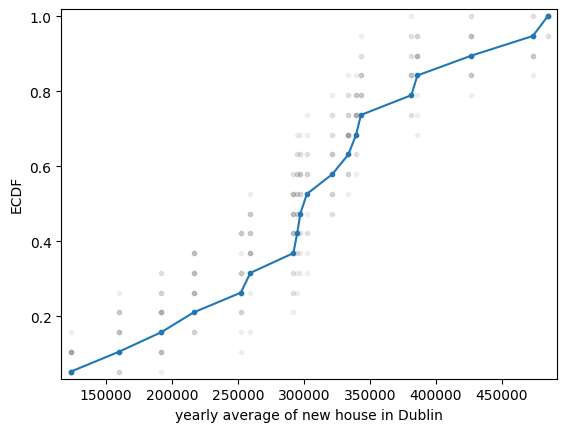

In [32]:
"""
dub_price = df.Dublin

cdf_dub.plot()

plt.xlabel('Year')
plt.ylabel('CDF')
plt.show()
"""
for _ in range(18):
    # Generate bootstrap sample: bs_sample
    dublin = df['Dublin']
    print(dublin)
    bs_sample = np.random.choice(dublin, size=len(dublin))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(dublin)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly average of new house in Dublin')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()



Dublin:  5880351
Waterford:  3709822
Difference: 2170529


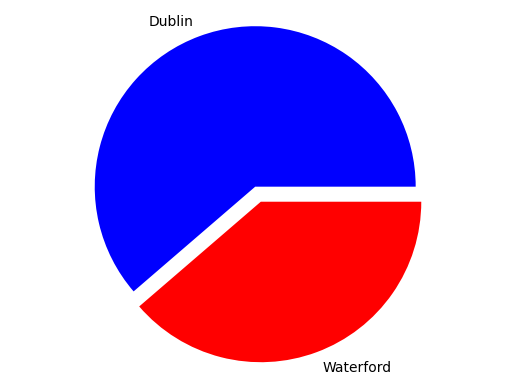

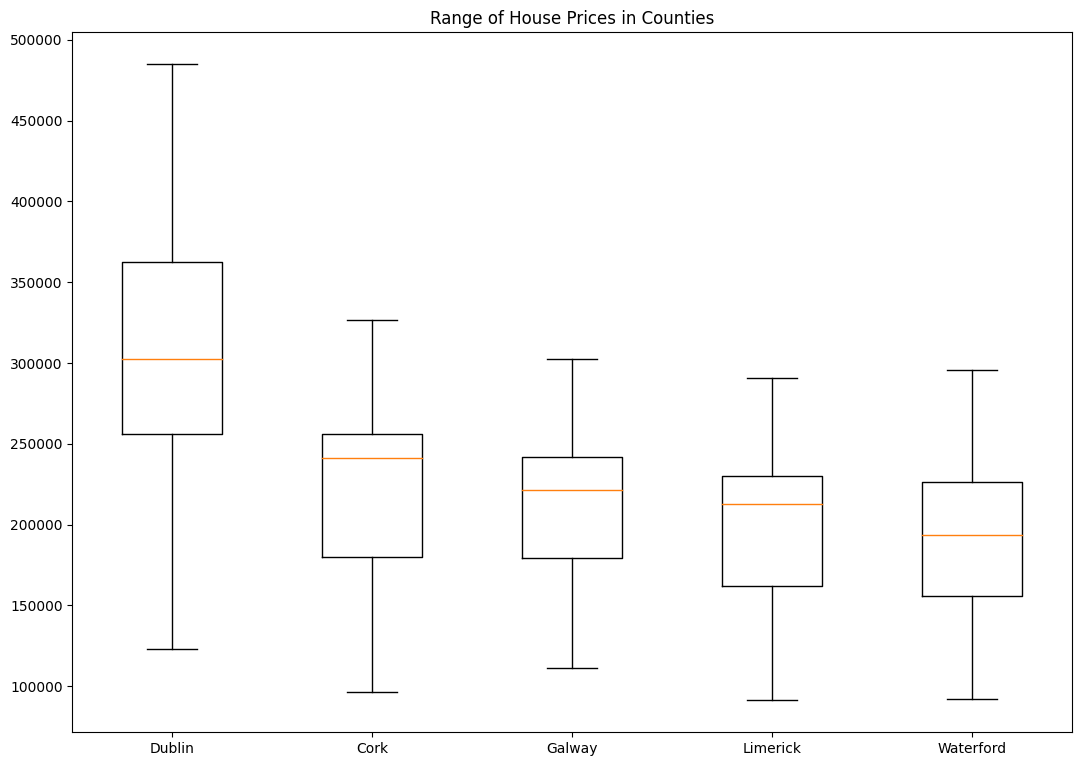

In [67]:

dublin = (df['Dublin']).sum()
waterford = (df['Waterford']).sum()
diff = dublin - waterford


print("Dublin: ", dublin)
print("Waterford: ", waterford)
print("Difference:", diff)

p = [dublin, waterford]
plt.pie(p,    #giving array
       labels = ['Dublin', 'Waterford'], #Correspndingly giving labels
       colors = ['blue', 'red'],   # Corresponding colors
       explode = (0.10, 0),    #How much the gap should me there between the pies
       startangle = 0)  #what start angle should be given
plt.axis('equal') 
plt.show()

subset = df[['Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford']]
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(subset)

# x-axis labels
ax.set_xticklabels(['Dublin', 'Cork',
                    'Galway', 'Limerick', 'Waterford'])
 
# Adding title
plt.title("Range of House Prices in Counties")
 
# show plot
plt.show()
